HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [91]:
HR=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [92]:
HR.shape

(1470, 35)

In [93]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [94]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [95]:
HR.columns = HR.columns.str.replace(' ', '_')
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [96]:
HR.isnull().sum()     #no Missing Values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

 Huge Null values in Cabin but this columns is irrelevent so drop it  from dataset

In [97]:
#HR = HR.drop(['Attrition'],axis=1)

# dropped 'Departments_ from the dataset

In [98]:
HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [99]:
HR.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool>

In [100]:
#dropping duplicate rows and resetting index
HR=HR.drop_duplicates()
print('Number of rows after removing duplicates=', len(HR))

Number of rows after removing duplicates= 1470


In [101]:
HR.duplicated().sum()

0

In [102]:
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Univariate Analysis 'Subscribed' variable

In [103]:
#Frequency of 'subscribed'
HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

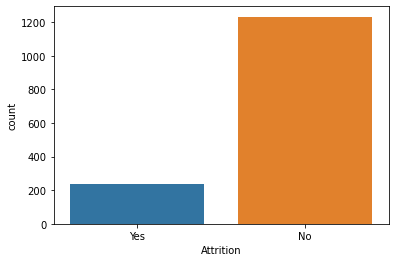

In [104]:
# Plotting the 'subscribed' frequency
sns.countplot(data=HR,x='Attrition')

In [105]:
#Normalizing the frequency table of 'Survived' variable
HR['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [106]:
#Frequency table
HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# EDA

In [108]:
HR.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# DESCRIPTIVE STATSTICS

In [65]:
HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [66]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   float64
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

OUTLIERS CHECKING(Any One outlier method can be  used)

In [67]:
colmlist=HR.columns.values
ncol=30
nrows=14

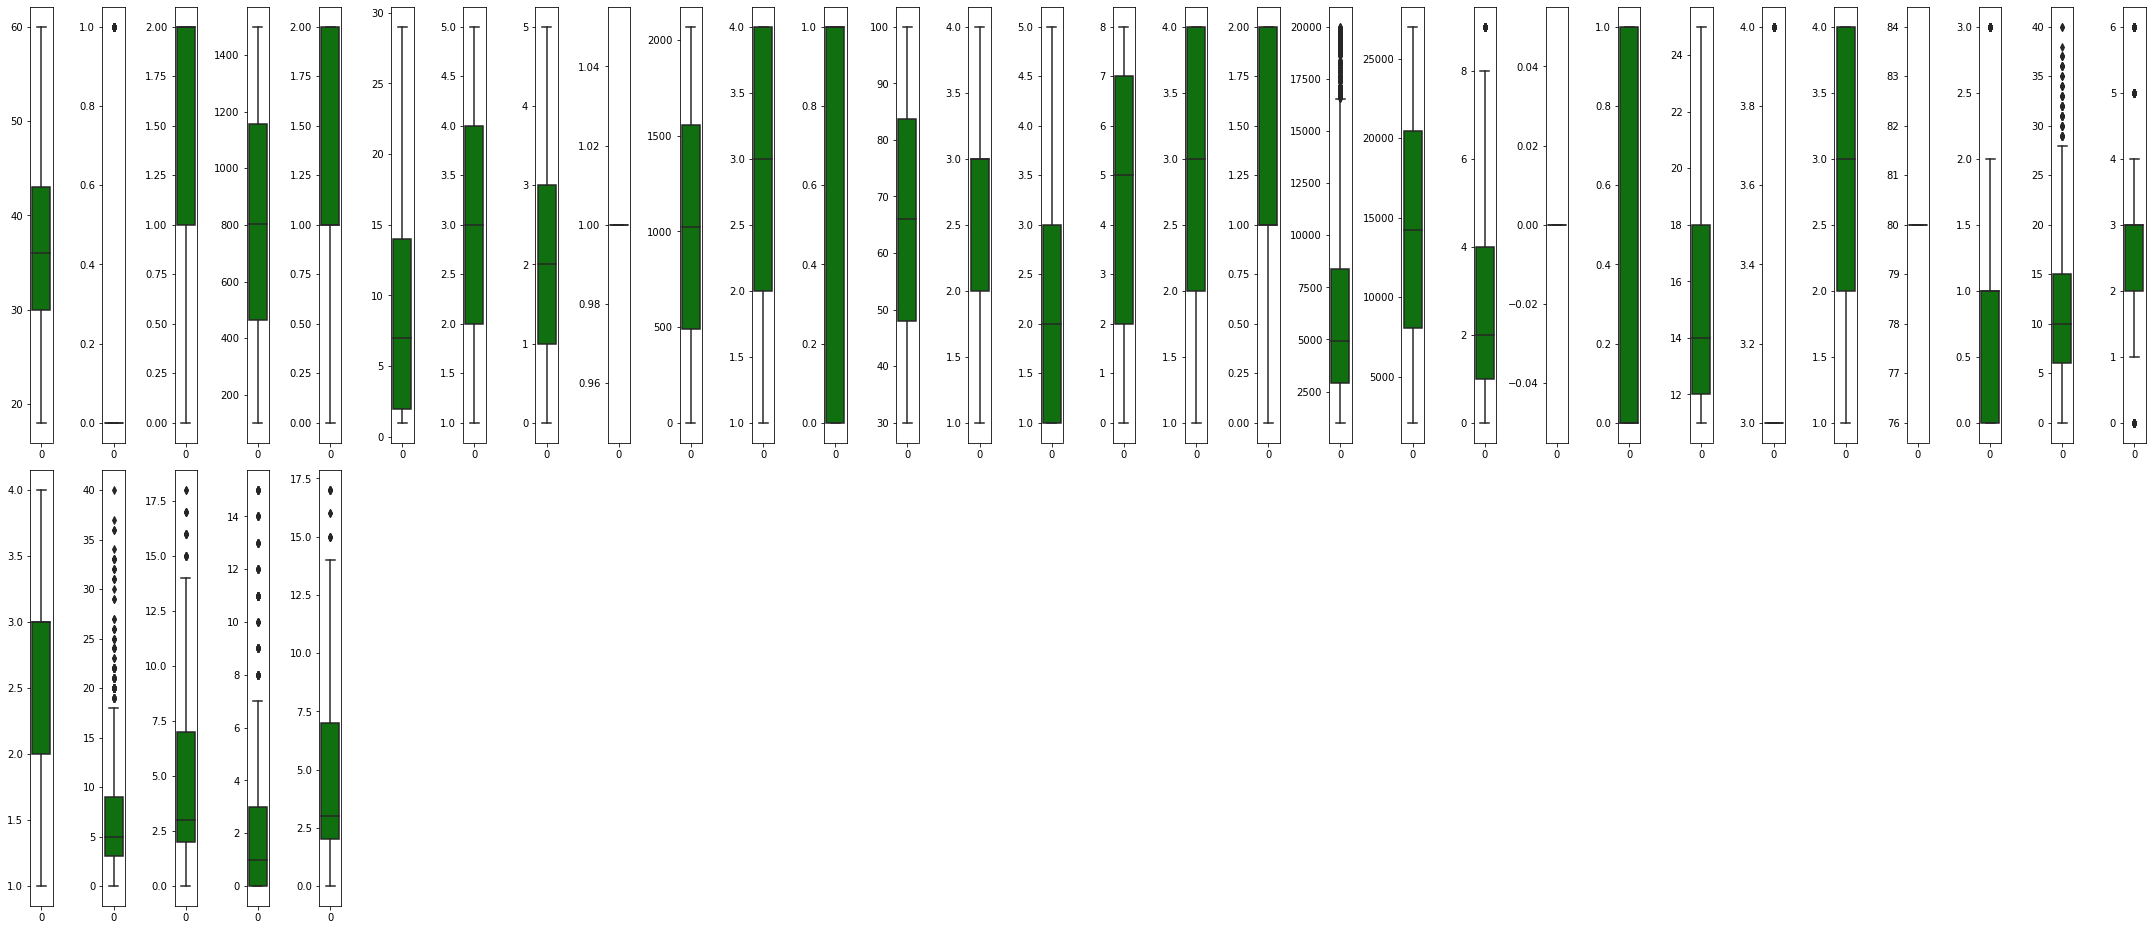

In [68]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= HR[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

Age                            AxesSubplot(0.125,0.125;0.0185407x0.755)
Attrition                   AxesSubplot(0.147249,0.125;0.0185407x0.755)
BusinessTravel              AxesSubplot(0.169498,0.125;0.0185407x0.755)
DailyRate                   AxesSubplot(0.191746,0.125;0.0185407x0.755)
Department                  AxesSubplot(0.213995,0.125;0.0185407x0.755)
DistanceFromHome            AxesSubplot(0.236244,0.125;0.0185407x0.755)
Education                   AxesSubplot(0.258493,0.125;0.0185407x0.755)
EducationField              AxesSubplot(0.280742,0.125;0.0185407x0.755)
EmployeeCount                AxesSubplot(0.30299,0.125;0.0185407x0.755)
EmployeeNumber              AxesSubplot(0.325239,0.125;0.0185407x0.755)
EnvironmentSatisfaction     AxesSubplot(0.347488,0.125;0.0185407x0.755)
Gender                      AxesSubplot(0.369737,0.125;0.0185407x0.755)
HourlyRate                  AxesSubplot(0.391986,0.125;0.0185407x0.755)
JobInvolvement              AxesSubplot(0.414234,0.125;0.0185407

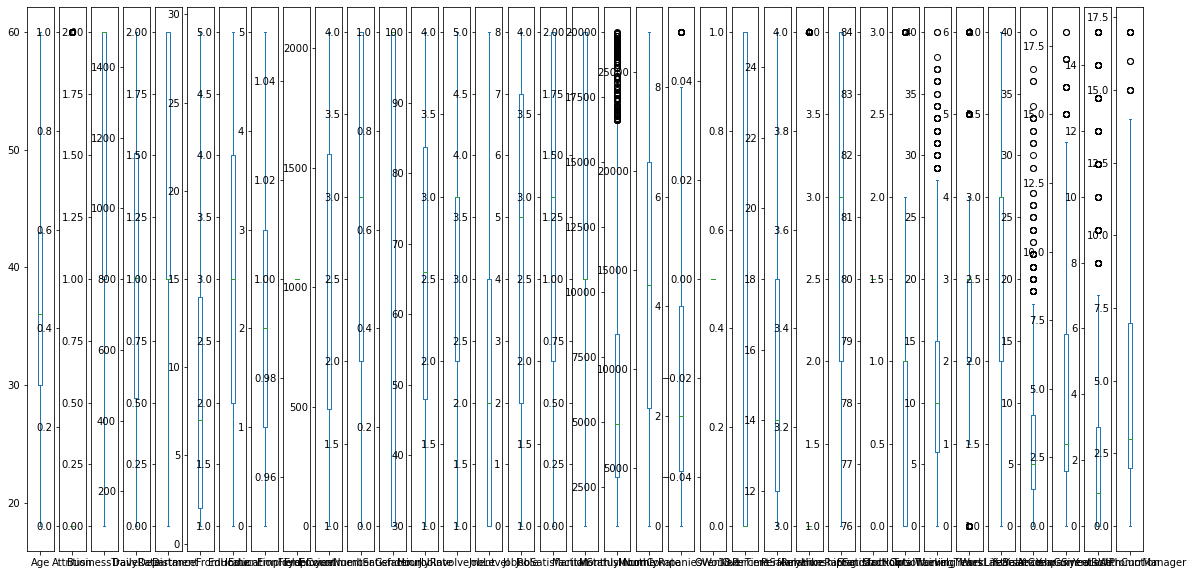

In [69]:
# to find out outliers in the dataset
HR.plot(kind='box',subplots=True,figsize=(20,10))

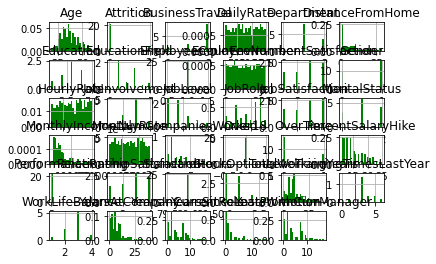

In [70]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
HR.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see only density and pH are little normally distributed rest all are skewed or unbalanced data
fixed acidity,volatile acidity ,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

In [71]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(HR)) < 3).all()

Age                          True
Attrition                    True
BusinessTravel               True
DailyRate                    True
Department                   True
DistanceFromHome             True
Education                    True
EducationField               True
EmployeeCount               False
EmployeeNumber               True
EnvironmentSatisfaction      True
Gender                       True
HourlyRate                   True
JobInvolvement               True
JobLevel                     True
JobRole                      True
JobSatisfaction              True
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
Over18                      False
OverTime                     True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction     True
StandardHours               False
StockOptionLevel             True
TotalWorkingYears           False
TrainingTimesL

In [72]:
#to remove outliers in data set through zscore
z = np.abs(zscore(HR))
z.shape

(1470, 35)

In [73]:
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.010909,0.891688,0.937414,NaN,1.701283,...,1.584178,NaN,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.147150,1.868426,0.937414,NaN,1.699621,...,1.191438,NaN,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.887515,0.891688,1.316673,NaN,1.696298,...,0.658973,NaN,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935
3,0.429664,0.438422,0.913194,1.461466,0.493817,0.764121,1.061787,0.937414,NaN,1.694636,...,0.266233,NaN,0.932014,0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.590048,0.524295,0.493817,0.887515,1.868426,0.565311,NaN,1.691313,...,1.191438,NaN,0.241988,0.678774,0.155707,0.338096,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.202082,0.493817,1.703764,0.891688,0.565311,NaN,1.721670,...,0.266233,NaN,0.241988,0.735447,0.155707,0.338096,0.327893,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.590048,0.469754,0.493817,0.393938,1.868426,0.565311,NaN,1.723332,...,1.584178,NaN,0.241988,0.293077,1.707500,0.338096,0.001333,0.764998,0.368715,0.806541
1467,1.086676,0.438422,0.590048,1.605183,0.493817,0.640727,0.085049,0.937414,NaN,1.726655,...,0.658973,NaN,0.241988,0.678774,2.171982,0.338096,0.164613,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.913194,0.546677,1.401512,0.887515,0.085049,0.565311,NaN,1.728317,...,1.191438,NaN,0.932014,0.735447,0.155707,1.077862,0.325228,0.488900,0.679146,1.086895


In [74]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([34, 33, 31, 33, 32, 33, 28, 28, 31, 33, 32, 33, 34, 28, 31, 33, 34,
       33, 28, 34, 31, 32, 33, 32, 34, 31, 33, 28, 31, 32, 33, 33, 34, 28,
       31, 31, 33, 33, 28, 32, 31, 31, 33, 31, 34, 33, 31, 28, 31, 33, 34,
       28, 34, 31, 33, 

In [75]:
HR_new=HR[(z<3).all(axis=1)]
print(HR.shape)

(1470, 35)


In [76]:
HR_new.shape

(0, 35)

In [77]:
print ("Old DataFrame =",HR.shape)
print ("New DataFrame =",HR_new.shape)
print ("Total dropped rows = ",HR.shape[0] - HR_new.shape[0])

Old DataFrame = (1470, 35)
New DataFrame = (0, 35)
Total dropped rows =  1470


In [78]:
#to find % loss in data
loss = (11959-11581)/11959 * 100
print(loss)

3.160799397942972


In [79]:
HR_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [80]:
# Independent column

x=HR_new.iloc[:,0:-1]
x

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion


In [81]:
x.shape

(0, 34)

In [82]:
# Target or dependent variable

y=HR_new.iloc[:,-1]
y

Series([], Name: YearsWithCurrManager, dtype: int64)

In [83]:
y.shape

(0,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [84]:
HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [85]:
HR.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [86]:
from sklearn.preprocessing import power_transform
x_new=power_transform(HR_new,method='yeo-johnson')

ValueError: Found array with 0 sample(s) (shape=(0, 35)) while a minimum of 1 is required by PowerTransformer.

In [ ]:
pd.DataFrame(x_new).skew()

In [ ]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

In [ ]:
x.mean()

In [ ]:
x.std()

Balancing the dataset over here,otherwise it will be a baised dataset

In [ ]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [ ]:
x.shape

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [ ]:
vif_cal()

# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [ ]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,11581):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10637)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

In [ ]:
x_train

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
y_train

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [ ]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

In [ ]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())

Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [ ]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[504]}


In [ ]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=10637), parameters, verbose=1, cv=10, n_jobs=-1)

In [ ]:
#training the model
gcv.fit(x_train,y_train)

In [ ]:
#finding out which parameter is giving best accuracy
gcv.best_params_

In [ ]:
type(gcv)

In [ ]:
# finding best estimator
gcv.best_estimator_

In [ ]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

ROC AUC Scores

In [ ]:
from sklearn.metrics import RocCurveDisplay
#svc_disp = RocCurveDisplay.from_estimator(gcv, x_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
plt.title("AUC ROC plot")
plt.show()

In [ ]:
gsv=GridSearchCV
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#saving the model
import joblib
joblib.dump(gcv,' HR ATTRITION.pkl')

In [ ]:
#Loading the saved model
HA=joblib.load(' HR ATTRITION.pkl')

In [ ]:
prediction = HA.predict(x_test)
prediction

In [ ]:
pd.DataFrame([HA.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

Let's now make the prediction on test dataset